In [1]:
from spikit import *

import numpy as np
import matplotlib.pyplot as plt

We first want to initialize our dressed system.

In [12]:
binary = Binary(1e3, 1)
dress = PowerLaw.from_binary(binary, 7/3, 1e16)

# Some quantities related to the binary
risco = binary.Risco()
r2 = 100 *risco # [pc] Separation

u = binary.u2(r2) # [m] Velocity of the secondary
T = binary.T(r2) # [s] Period of the binary

And include the acting forces on it. Here, we only consider the feedback of accretion. The accretion force is only used to produce that.

In [13]:
acc = AccretionIso(dress) # A temporary force.
# We can also change the cross section of the accretion force
acc.csection = lambda u, r2, m2 = None: pi *(3 *binary.rhill(r2))**2 *pc**2 # [m2] 

dfacc = AccretionDepletion(acc)

blueprint = StuckAccretionDepletedPowerLaw(acc) # A `blueprint` with analytical solutions.

Norbits = 25
dress.f_eps = blueprint.feps(r2, Norbits *T)

/Users/mybook/Documents/Coding Packages/spikekit/spikit/feedback.py:31: RuntimeWarning: invalid value encountered in sqrt
  vE = np.sqrt(2 *(self.binary.M1.Psi(r2) -self.spike.eps) ) # [m/s]


Its distribution function will exhibit a well-like structure around the energies that correspond to the central potential at the separation.

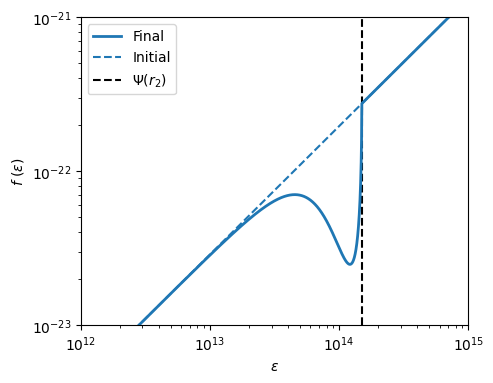

In [14]:
plt.figure(figsize = (5, 4))
plt.loglog(dress.eps, dress.f_eps, label = "Final", linewidth = 2)
plt.loglog(dress.eps, dress.feps_init(dress.eps), c = "C0", ls = "--", label = "Initial")

plt.axvline(binary.M1.Psi(r2), c = "k", ls = "--", label = "$\Psi(r_2)$", zorder = -1)

plt.xlabel("$\epsilon$")
plt.ylabel("$f\,\,(\epsilon)$")

plt.xlim(1e12, 1e15)
plt.ylim(1e-23, 1e-21)
plt.legend()

Consequently, the density of particles is depleted around the path of the companion.

Text(0, 0.5, '$\\rho\\,/\\,\\rho_0$')

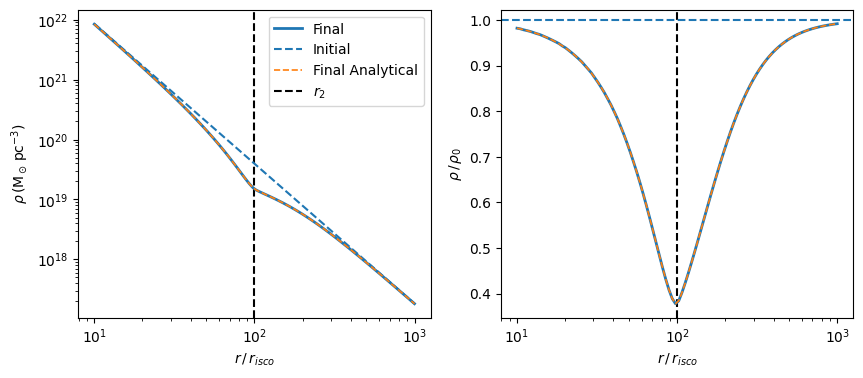

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
r_grid = np.logspace(1, 3, 100) *risco # [pc]
rho_grid = np.array([dress.rho(r) for r in r_grid]) # [Msun/pc^3]
rho0 = dress.rho_init(r_grid)

ax[0].loglog(r_grid/risco, rho_grid, label = "Final", linewidth = 2)
ax[0].loglog(r_grid/risco, rho0, c = "C0", ls = "--", label = "Initial")

rho_ = np.vectorize(blueprint.rho)(r_grid, r2, Norbits *T)
ax[0].loglog(r_grid/risco, rho_, label = "Final Analytical", c = "C1", ls = "--", linewidth = 1.2)
ax[0].axvline(r2/risco, c = "k", ls = "--", label = "$r_2$", zorder = -1)

ax[0].legend()

ax[0].set_xlabel("$r\,/\,r_{isco}$")
ax[0].set_ylabel("$\\rho\,(\mathrm{M}_\odot\,\mathrm{pc}^{-3})$")

# ==========================
ax[1].semilogx(r_grid/risco, rho_grid/rho0, label = "Final", linewidth = 2)
ax[1].semilogx(r_grid/risco, rho_/rho0, label = "Final Analytical", c = "C1", ls = "--", linewidth = 1.2)
ax[1].axhline(1, c = "C0", ls = "--", label = "Initial")
ax[1].axvline(r2/risco, c = "k", ls = "--", label = "$r_2$", zorder = -1)

ax[1].set_xlabel("$r\,/\,r_{isco}$")
ax[1].set_ylabel("$\\rho\,/\,\\rho_0$")

Using the blueprint we can quickly explore various relations. Such as the time-evolution of the well's depth.

Text(0, 0.5, '$\\rho(r_2, t)/\\rho(r_2, 0)$')

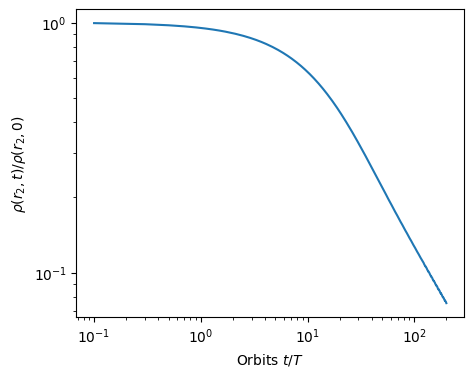

In [17]:
N = np.linspace(0.1, 200, 1000)

rho = np.vectorize(blueprint.rho)(r2, r2, N *T)
rho0 = blueprint.rho(r2, r2, 0)

plt.figure(figsize = (5, 4))
plt.loglog(N, rho/rho0, label = "$\gamma = 2$")

plt.xlabel("Orbits $t/T$")
plt.ylabel("$\\rho(r_2, t)/\\rho(r_2, 0)$")